In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
from mysql.connector import errorcode
from urllib.parse import quote_plus
from sqlalchemy import create_engine

In [4]:
config = {
    'host': 'localhost',
    'user': 'root',
    'password': '@Pandasz1383',
    'database': 'Basketball_Reference'
}

password = quote_plus("@Pandasz1383")
engine = create_engine(
    f"mysql+mysqlconnector://{config['user']}:{password}@{config['host']}/{config['database']}"
)

In [7]:
query_champions = """
    SELECT p.Name, p.Height, p.Experience, s.Season
    FROM champion_players cp
    JOIN players p ON cp.PlayerID = p.PlayerID
    JOIN seasons s ON cp.SeasonID = s.SeasonID
    JOIN champions c ON cp.ChampionID = c.ChampionID
    WHERE s.Season IN ('2022-23','2023-24')
    ORDER BY s.Season, p.Height DESC;
"""
championplayers = pd.read_sql(query_champions, engine)
print(championplayers)

                        Name  Height  Experience   Season
0               Nikola Jokić     211          10  2022-23
1             DeAndre Jordan     211          17  2022-23
2         Michael Porter Jr.     208           6  2022-23
3              Thomas Bryant     208           8  2022-23
4                 Zeke Nnaji     206           5  2022-23
5              Vlatko Čančar     203           5  2022-23
6                 Jeff Green     203          17  2022-23
7               Aaron Gordon     203          11  2022-23
8              Peyton Watson     203           3  2022-23
9                 Jack White     201           2  2022-23
10           Christian Braun     198           3  2022-23
11                Davon Reed     196           4  2022-23
12  Kentavious Caldwell-Pope     196          12  2022-23
13              Jamal Murray     193           8  2022-23
14               Bruce Brown     193           7  2022-23
15            Reggie Jackson     188          14  2022-23
16            

In [8]:
query_top15 = """
    SELECT p.Name, p.Height, p.Experience, s.Season, pr.Rank
    FROM player_ranks pr
    JOIN players p ON pr.PlayerID = p.PlayerID
    JOIN seasons s ON pr.SeasonID = s.SeasonID
    WHERE s.Season IN ('2022-23','2023-24') AND pr.Rank <= 15
    ORDER BY pr.Rank;
"""
top15 = pd.read_sql(query_top15, engine)
    
print(top15)

                       Name  Height  Experience   Season  Rank
0              Jayson Tatum     203           8  2022-23     1
1               Luka Dončić     198           7  2023-24     1
2               Joel Embiid     213           9  2022-23     2
3   Shai Gilgeous-Alexander     198           7  2023-24     2
4               Luka Dončić     198           7  2022-23     3
5     Giannis Antetokounmpo     211          12  2023-24     3
6   Shai Gilgeous-Alexander     198           7  2022-23     4
7             Jalen Brunson     188           7  2023-24     4
8     Giannis Antetokounmpo     211          12  2022-23     5
9              Nikola Jokić     211          10  2023-24     5
10          Anthony Edwards     193           5  2022-23     6
11          Anthony Edwards     193           5  2023-24     6
12            Julius Randle     206          11  2022-23     7
13             Kevin Durant     211          17  2023-24     7
14         Donovan Mitchell     190           8  2022-2

In [10]:
champions_height_stats = championplayers['Height'].describe()
top15_height_stats = top15['Height'].describe()
champions_exp_stats = championplayers['Experience'].describe()
top15_exp_stats = top15['Experience'].describe()

print('Champions Height Players')
print('\n')
print(champions_height_stats)
print('\n')
print('15 Top Height Players')
print('\n')
print(top15_height_stats)

Champions Height Players


count     37.000000
mean     200.432432
std        8.671603
min      183.000000
25%      193.000000
50%      201.000000
75%      206.000000
max      218.000000
Name: Height, dtype: float64


15 Top Height Players


count     30.000000
mean     198.633333
std        8.318999
min      185.000000
25%      190.750000
50%      198.000000
75%      205.250000
max      213.000000
Name: Height, dtype: float64


In [11]:
print('Champions Experience Players')
print('\n')
print(champions_exp_stats)
print('\n')
print('15 Top Experience Players')
print('\n')
print(top15_exp_stats)

Champions Experience Players


count    37.000000
mean      7.486486
std       4.574213
min       2.000000
25%       4.000000
50%       6.000000
75%       9.000000
max      18.000000
Name: Experience, dtype: float64


15 Top Experience Players


count    30.000000
mean     10.100000
std       4.071346
min       5.000000
25%       7.000000
50%       9.000000
75%      12.000000
max      22.000000
Name: Experience, dtype: float64


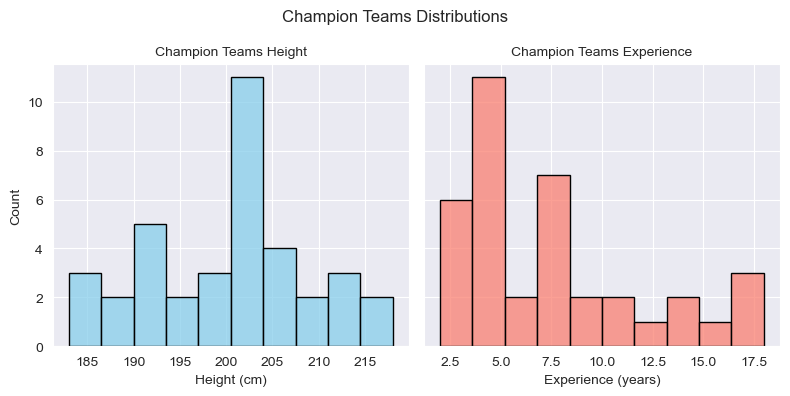

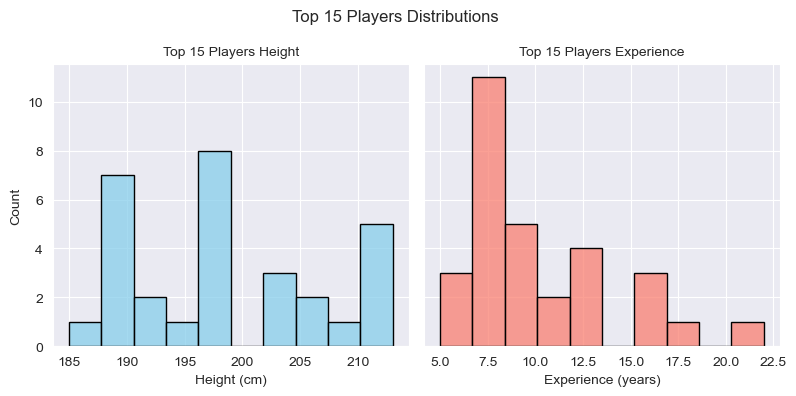

C:\Users\hesam\AppData\Local\Temp\ipykernel_8516\136119823.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_height, x='Group', y='Height', palette=['skyblue', 'salmon'], width=0.5)


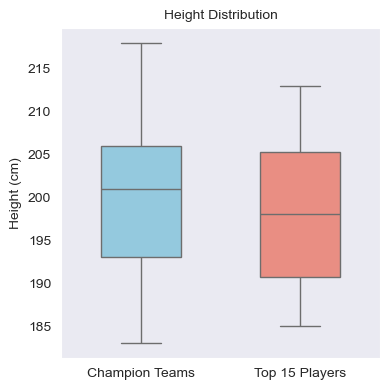

C:\Users\hesam\AppData\Local\Temp\ipykernel_8516\136119823.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_exp, x='Group', y='Experience', palette=['skyblue', 'salmon'], width=0.5)


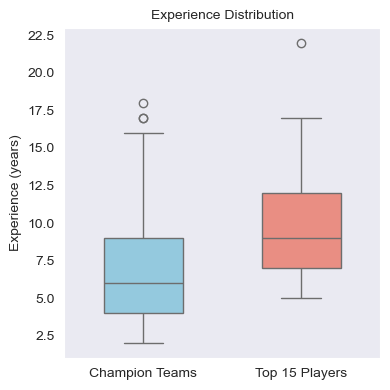

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
sns.histplot(championplayers['Height'], bins=10, color='skyblue', ax=axes[0], kde=False, edgecolor='black')
axes[0].set_title('Champion Teams Height', fontsize=10)
axes[0].set_xlabel('Height (cm)')
axes[0].set_ylabel('Count')

sns.histplot(championplayers['Experience'], bins=10, color='salmon', ax=axes[1], kde=False, edgecolor='black')
axes[1].set_title('Champion Teams Experience', fontsize=10)
axes[1].set_xlabel('Experience (years)')
axes[1].set_ylabel('')

fig.suptitle('Champion Teams Distributions', fontsize=12)
plt.tight_layout()
plt.savefig('champion_histogram.png')
plt.show()


fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
sns.histplot(top15['Height'], bins=10, color='skyblue', ax=axes[0], kde=False, edgecolor='black')
axes[0].set_title('Top 15 Players Height', fontsize=10)
axes[0].set_xlabel('Height (cm)')
axes[0].set_ylabel('Count')

sns.histplot(top15['Experience'], bins=10, color='salmon', ax=axes[1], kde=False, edgecolor='black')
axes[1].set_title('Top 15 Players Experience', fontsize=10)
axes[1].set_xlabel('Experience (years)')
axes[1].set_ylabel('')

fig.suptitle('Top 15 Players Distributions', fontsize=12)
plt.tight_layout()
plt.savefig('top15_histogram.png')
plt.show()


plt.figure(figsize=(4, 4))
df_height = pd.DataFrame({
    'Height': list(championplayers['Height']) + list(top15['Height']),
    'Group': ['Champion Teams'] * len(championplayers) + ['Top 15 Players'] * len(top15)
})
sns.boxplot(data=df_height, x='Group', y='Height', palette=['skyblue', 'salmon'], width=0.5)
plt.title('Height Distribution', fontsize=10)
plt.ylabel('Height (cm)')
plt.xlabel('')
plt.grid(False)
plt.tight_layout()
plt.savefig('height_boxplot.png')
plt.show()


plt.figure(figsize=(4, 4))
df_exp = pd.DataFrame({
    'Experience': list(championplayers['Experience']) + list(top15['Experience']),
    'Group': ['Champion Teams'] * len(championplayers) + ['Top 15 Players'] * len(top15)
})
sns.boxplot(data=df_exp, x='Group', y='Experience', palette=['skyblue', 'salmon'], width=0.5)
plt.title('Experience Distribution', fontsize=10)
plt.ylabel('Experience (years)')
plt.xlabel('')
plt.grid(False)
plt.tight_layout()
plt.savefig('experience_boxplot.png')
plt.show()

<div style="font-family:Tahoma, sans-serif; direction:rtl; line-height:1.8; font-size:17px; text-align:justify; padding:12px; border:1px solid #ddd; border-radius:8px; box-sizing:border-box; max-width:100%; margin:0 auto;">
  <p style="font-weight:bold; color:#0066cc; margin-top:0;">
    تحلیل آماری و توصیفی توزیع قد و تجربه (دو فصل آخر)
  </p>
</div>

<div style="font-family:Tahoma, sans-serif; direction:rtl; line-height:1.8; font-size:17px; text-align:justify; padding:12px; border:1px solid #ddd; border-radius:8px; box-sizing:border-box; max-width:100%; margin:0 auto; margin-top:15px;">
  <p style="font-weight:bold; color:#0066cc; margin-top:0;">
    تحلیل قد
  </p>
  <p>
    <b>توزیع قد (هیستوگرام):</b> تیم‌های قهرمان اوج توزیع قد را بین 200 تا 205 سانتی‌متر دارند، با تمرکز روی قدهای بلندتر (نزدیک 200 سانتی‌متر).
    ۱۵ بازیکن برتر اوج توزیع را نزدیک 185 تا 190 و 195 تا 200 سانتی‌متر است.
  </p>
  <p>
    <b>باکس‌پلات:</b> میانه قد تیم‌های قهرمان (201 سانتی‌متر) بالاتر از ۱۵ بازیکن برتر (198 سانتی‌متر) است. چارک سوم قهرمان‌ها (206 سانتی‌متر) بیشتر از چارک سوم برترها (205.25 سانتی‌متر) است.
    <br><b>نتیجه:</b> تیم‌های قهرمان قد بلندتر و یکنواخت‌تری دارند، در حالی که ۱۵ بازیکن برتر پراکندگی بیشتری در قد نشان می‌دهند، که می‌تواند به نقش‌های تخصصی‌تر مربوط باشد.
  </p>
</div>

<div style="font-family:Tahoma, sans-serif; direction:rtl; line-height:1.8; font-size:17px; text-align:justify; padding:12px; border:1px solid #ddd; border-radius:8px; box-sizing:border-box; max-width:100%; margin:0 auto; margin-top:15px;">
  <p style="font-weight:bold; color:#0066cc; margin-top:0;">
    تحلیل تجربه
  </p>
  <p>
    <b>توزیع تجربه (هیستوگرام):</b> تیم‌های قهرمان اوج توزیع را بین ۲ تا 7.5 سال تجربه دارند، با تمرکز روی بازیکنان کم‌تجربه‌تر که نشان‌دهنده استفاده از نیروی جوان و پویاست.
    ۱۵ بازیکن برتر اوج توزیع را بین 7 تا 12.5 سال تجربه نشان می‌دهند، که حضور ستاره‌های باتجربه و حرفه‌ای را تأیید می‌کند.
    <br><b>نتیجه:</b> تیم‌های قهرمان از ترکیب جوان‌تر و کم‌تجربه‌تر استفاده می‌کنند، در حالی که ۱۵ بازیکن برتر به تجربه بالا و مهارت‌های انفرادی تکیه دارند.
  </p>
  <p>
    <b>باکس‌پلات:</b> میانه تجربه تیم‌های قهرمان (۶ سال) کمتر از ۱۵ بازیکن برتر (۹ سال) است. چارک سوم قهرمان‌ها (۹ سال) کمتر از چارک سوم برترها (۱۲ سال) است، و اوت‌لایِرهایی مثل ۱۸ یا ۲۲ سال تجربه در هر دو گروه دیده می‌شود.
    <br><b>نتیجه:</b> تجربه در تیم‌های قهرمان متمرکزتر و کمتر است، ولی ۱۵ بازیکن برتر به بازیکنان باسابقه و حرفه‌ای وابسته‌اند.
  </p>
</div>

<div style="font-family:Tahoma, sans-serif; direction:rtl; line-height:1.8; font-size:17px; text-align:justify; padding:12px; border:1px solid #ddd; border-radius:8px; box-sizing:border-box; max-width:100%; margin:0 auto; margin-top:15px;">
  <p style="font-weight:bold; color:#0066cc; margin-top:0;">
    نتیجه‌گیری کلی
  </p>
  <p>
    <b>قد:</b> تیم‌های قهرمان با میانگین قد 200.43 سانتی‌متر و میانه 201 سانتی‌متر، نسبت به ۱۵ بازیکن برتر (میانگین 198.63 سانتی‌متر، میانه 198 سانتی‌متر) قد بلندتری دارند.
    این نشان می‌دهد قد در موفقیت تیمی (مثل ریباند، دفاع، و پوشش زمین) نقش کلیدی دارد و تیم‌های قهرمان از این مزیت فیزیکی بهره می‌برند.
  </p>
  <p>
    <b>تجربه:</b> ۱۵ بازیکن برتر با میانگین 10.10 سال و میانه ۹ سال تجربه، نسبت به قهرمان‌ها (میانگین 7.48 سال، میانه ۶ سال) تجربه بیشتری دارند.
    این تأیید می‌کند که امتیازدهی بالا و رتبه‌بندی برتر به بازیکنان باسابقه و مهارت انفرادی بستگی دارد.
  </p>
  <p>
    <b>تضاد و تعادل:</b> تیم‌های قهرمان با ترکیب قد بلند و تجربه متوسط، انعطاف‌پذیری تیمی و تعادل بین جوانی و فیزیک را نشان می‌دهند.
    در مقابل، ۱۵ بازیکن برتر روی تجربه بالا و مهارت‌های انفرادی تمرکز دارند، که برای عملکرد انفرادی عالی است ولی لزوماً برای موفقیت تیمی کافی نیست.
  </p>
</div>
